In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [12]:
df = pd.read_csv('cleaned_dataset_EDA.csv')

In [13]:
df.shape

(921372, 49)

In [14]:
df.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Carrier,Origin,OriginCityName,OriginState,OriginWac,Dest,DestCityName,DestState,DestWac,CRSDepTime,DepTimeBlk,CRSArrTime,ArrTimeBlk,CRSElapsedTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AptPreviousDateDelay,AptNoOfFlight,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,presentwx,IsDelay
0,8381,2017,2,4,2,7,2017-04-02,OO,ORD,"Chicago, IL",IL,41,MBS,"Saginaw/Bay City/Midland, MI",MI,43,13,1300-1359,15,1500-1559,72.0,222.0,1,NaN,NaN,NaN,NaN,NaN,85.0,715.0,57.9,34.0,40.43,140.0,10.0,0.0,30.06,10.0,0.0,BKN,BKN,OVC,M,8500.0,16000.0,25000.0,-1.0,M,0
1,8382,2017,2,4,2,7,2017-04-02,AA,PHX,"Phoenix, AZ",AZ,81,SEA,"Seattle, WA",WA,93,22,2200-2259,1,0001-0559,188.0,1107.0,5,NaN,NaN,NaN,NaN,NaN,56.0,478.0,73.9,32.0,21.40,250.0,4.0,0.0,29.83,10.0,0.0,CLR,M,M,M,-1.0,-1.0,-1.0,-1.0,M,0
2,8383,2017,2,4,2,7,2017-04-02,WN,MSP,"Minneapolis, MN",MN,63,BWI,"Baltimore, MD",MD,35,6,0600-0659,10,1000-1059,140.0,936.0,4,NaN,NaN,NaN,NaN,NaN,22.0,378.0,45.0,34.0,65.13,180.0,5.0,0.0,30.05,10.0,0.0,BKN,M,M,M,10000.0,-1.0,-1.0,-1.0,M,0
3,8384,2017,2,4,2,7,2017-04-02,OO,DEN,"Denver, CO",CO,82,FCA,"Kalispell, MT",MT,84,11,1100-1159,13,1300-1359,138.0,752.0,4,NaN,NaN,NaN,NaN,NaN,91.0,603.0,57.0,28.0,32.75,-1.0,4.0,0.0,29.87,10.0,0.0,FEW,FEW,M,M,7000.0,22000.0,-1.0,-1.0,M,0
4,8385,2017,2,4,2,7,2017-04-02,OO,ATL,"Atlanta, GA",GA,34,ORD,"Chicago, IL",IL,41,18,1800-1859,19,1900-1959,127.0,606.0,3,NaN,NaN,NaN,NaN,NaN,70.0,1051.0,81.0,45.0,28.15,140.0,6.0,0.0,29.97,10.0,0.0,BKN,BKN,M,M,20000.0,25000.0,-1.0,-1.0,M,0


In [15]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)


In [16]:
print("Total records: ", len(df))
print("Records for April: ", sum(df.Month == 4))
print("Records for May: ", sum(df.Month == 5))
print("Records for June: ", sum(df.Month == 6))

Total records:  921372
Records for April:  290671
Records for May:  315606
Records for June:  315095


In [18]:
df[['Origin','OriginCityName']].drop_duplicates().sort_values('Origin').set_index('Origin')

,OriginCityName
Origin,
ATL,"Atlanta, GA"
BOS,"Boston, MA"
BWI,"Baltimore, MD"
CLT,"Charlotte, NC"
DEN,"Denver, CO"
DFW,"Dallas/Fort Worth, TX"
DTW,"Detroit, MI"
EWR,"Newark, NJ"
IAH,"Houston, TX"


In [22]:
# Convert FlightDate to datetime object
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

### Percentage of delay flight of each airports

In [56]:
df_delay = df.groupby(['Origin'])['IsDelay'].sum()/df.groupby(['Origin'])['IsDelay'].count()
df_delay

Origin
ATL    0.252136
BOS    0.291734
BWI    0.226008
CLT    0.238908
DEN    0.221105
DFW    0.304980
DTW    0.184712
EWR    0.313361
IAH    0.195659
JFK    0.326095
LAS    0.223394
LAX    0.280023
LGA    0.281662
MCO    0.261411
MSP    0.175398
ORD    0.245516
PHX    0.182958
SEA    0.199640
SFO    0.288961
SLC    0.124107
Name: IsDelay, dtype: float64

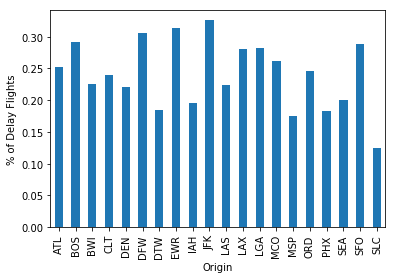

In [58]:
df_delay.plot.bar()
plt.ylabel('% of Delay Flights')
plt.show()

In [61]:
d1 = df.groupby(df.set_index('FlightDate').index.date)['IsDelay'].sum()

### Percentage of delay flight of each carriers

In [62]:
df_carrier_delay = df.groupby(['Carrier'])['IsDelay'].sum()/df.groupby(['Carrier'])['IsDelay'].count()
df_carrier_delay

Carrier
AA    0.247873
AS    0.204495
B6    0.343568
DL    0.216294
EV    0.252349
F9    0.264974
HA    0.191568
NK    0.270424
OO    0.214630
UA    0.217828
VX    0.372073
WN    0.264856
Name: IsDelay, dtype: float64

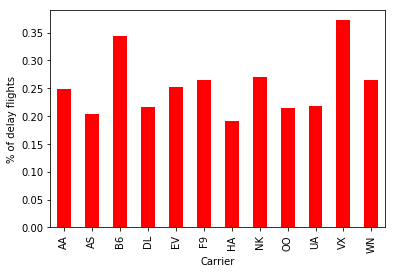

In [64]:
df_carrier_delay.plot.bar(color='r')
plt.ylabel('% of delay flights')
plt.show()